## Observations and Insights 

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouseCount = combined_df['Mouse ID'].count()
mouseCount

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_df[combined_df.duplicated(['Mouse ID'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates('Mouse ID')
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Summary = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_variance,
                        "Standard Deviation": tumor_std, "SEM": tumor_sem})
Summary.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,66.173479,0.596466


## Bar and Pie Charts

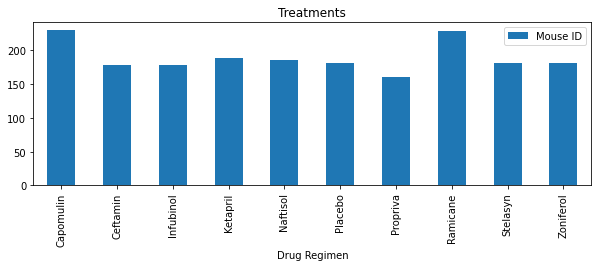

<Figure size 432x288 with 0 Axes>

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_count = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()

drugs_df = regimen_count[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")
drugs_df.plot(kind="bar", figsize=(10,3))

plt.title("Treatments")
plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Regimen Count')

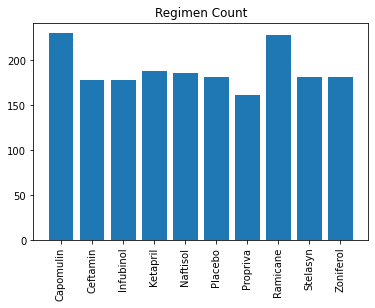

In [27]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#create axis' 
regimen_list = Summary.index.tolist()
Regiments = (combined_df.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
# Create plot and clean up for legibility
x_axis = regimen_list
y_axis = Regiments
plt.bar(x_axis, y_axis)
plt.tight_layout
plt.xticks (rotation="vertical")
plt.title("Regimen Count")

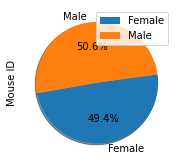

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex =  pd.DataFrame(combined_df.groupby('Sex').count()).reset_index()
#sex
sex = sex[["Sex","Mouse ID"]]
ax1 = plt.subplot(121, aspect="equal")
sex.plot(kind="pie", ax=ax1, y="Mouse ID", autopct='%1.1f%%', startangle=190, shadow=True, labels=sex["Sex"])

Text(0.5, 1.0, 'Distribution of Males vs Females')

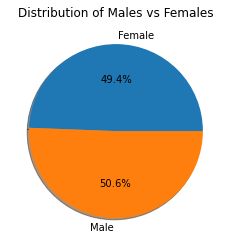

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex2 = (combined_df.groupby(["Sex"])["Mouse ID"].count()).tolist()
#sex2

#setup plot and create it
labels = ["Female", "Male"]
plt.pie(sex2, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Distribution of Males vs Females")

## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
c_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
r_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane", :]
i_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol", :]
ce_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]

In [85]:
#sorting by tumor size for each drug regimen
c_tumors = c_df.sort_values(['Tumor Volume (mm3)'],ascending=True).reset_index()
c_tumors = c_tumors["Tumor Volume (mm3)"]
#c_tumors
r_tumors = r_df.sort_values(['Tumor Volume (mm3)'],ascending=True).reset_index()
r_tumors = r_tumors["Tumor Volume (mm3)"]
#r_tumors
i_tumors = i_df.sort_values(['Tumor Volume (mm3)'],ascending=True).reset_index()
i_tumors = i_tumors["Tumor Volume (mm3)"]
#i_tumors
ce_tumors = ce_df.sort_values(['Tumor Volume (mm3)'],ascending=True).reset_index()
ce_tumors = ce_tumors["Tumor Volume (mm3)"]
#ce_tumors

In [86]:
#looking for outliers for drug Capomulin
print("------------------------------------------------------")
print("Capomulin Outliers")
quartiles = c_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"Lower quartile range is: {lowerq}")
print(f"Upper quartile range is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are likley outliers.")
print(f"Values above {upper_bound} are likely outliers.")
print("------------------------------------------------------")


#Finding outliers for ramicane
print("------------------------------------------------------")
print("Ramicane Outliers")
quartiles = r_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"Lower quartile range is: {lowerq}")
print(f"Upper quartile range is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are likley outliers.")
print(f"Values above {upper_bound} are likely outliers.")
print("------------------------------------------------------")


#Finding outliers for Infubinol
print("------------------------------------------------------")
print("Infubinol Outliers")
quartiles = i_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"Lower quartile range is: {lowerq}")
print(f"Upper quartile range is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are likley outliers.")
print(f"Values above {upper_bound} are likely outliers.")
print("------------------------------------------------------")


#Finding outliers for Ceftamin
print("------------------------------------------------------")
print("Ceftamin Outliers")
quartiles = ce_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"Lower quartile range is: {lowerq}")
print(f"Upper quartile range is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are likley outliers.")
print(f"Values above {upper_bound} are likely outliers.")
print("------------------------------------------------------")

------------------------------------------------------
Capomulin Outliers
Lower quartile range is: 37.685932865
Upper quartile range is: 45.0
The interquartile range is: 7.314067135000002
The median is: 41.557808879999996
Values below 26.714832162499995 are likley outliers.
Values above 55.9711007025 are likely outliers.
------------------------------------------------------
------------------------------------------------------
Ramicane Outliers
Lower quartile range is: 36.67463458499999
Upper quartile range is: 45.0
The interquartile range is: 8.325365415000007
The median is: 40.67323554
Values below 24.18658646249998 are likley outliers.
Values above 57.48804812250001 are likely outliers.
------------------------------------------------------
------------------------------------------------------
Infubinol Outliers
Lower quartile range is: 47.3123533
Upper quartile range is: 57.314443967500004
The interquartile range is: 10.002090667500006
The median is: 51.82058438
Values below 32.

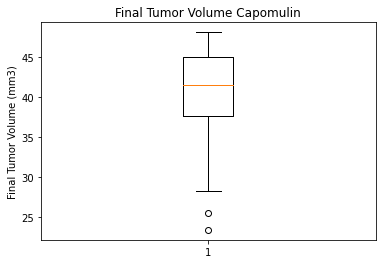

In [89]:
#Creating box and whisker plots for each of the four drugs
#Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Capomulin")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(c_tumors)
plt.show()

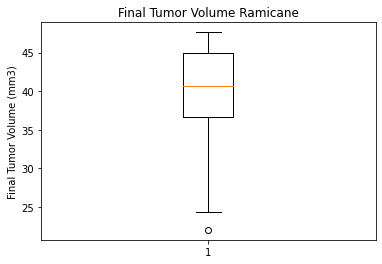

In [90]:
#Creating box and whisker plots for each of the four drugs
#Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Ramicane")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(r_tumors)
plt.show()

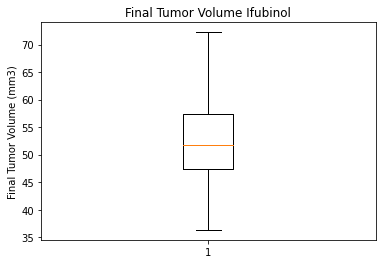

In [91]:
#Creating box and whisker plots for each of the four drugs
#Ifubinol
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Ifubinol")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(i_tumors)
plt.show()

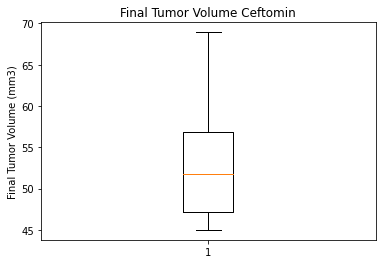

In [92]:
#Creating box and whisker plots for each of the four drugs
#Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Ceftomin")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(ce_tumors)
plt.show()

## Line and Scatter Plots

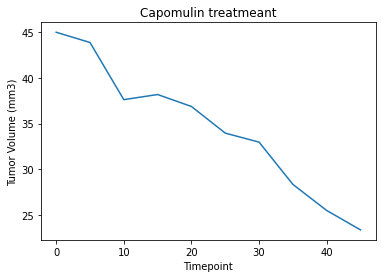

In [102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#c_df.head()

#selecting one mouse from the filtered on capomulin df
c_mouse = c_df.loc[c_df["Mouse ID"] == 's185']

#from selected mouse create line chart
x_axis2 = c_mouse["Timepoint"]
cm_tumor = c_mouse["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant')
plt.plot(x_axis2, cm_tumor)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

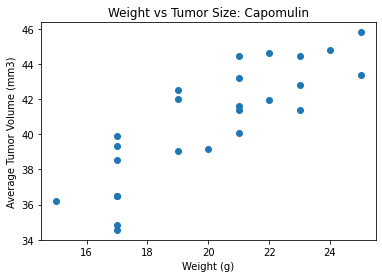

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

c_avg = c_df.groupby(['Mouse ID']).mean()
plt.scatter(c_avg['Weight (g)'],c_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Tumor Size: Capomulin')
plt.show()

## Correlation and Regression

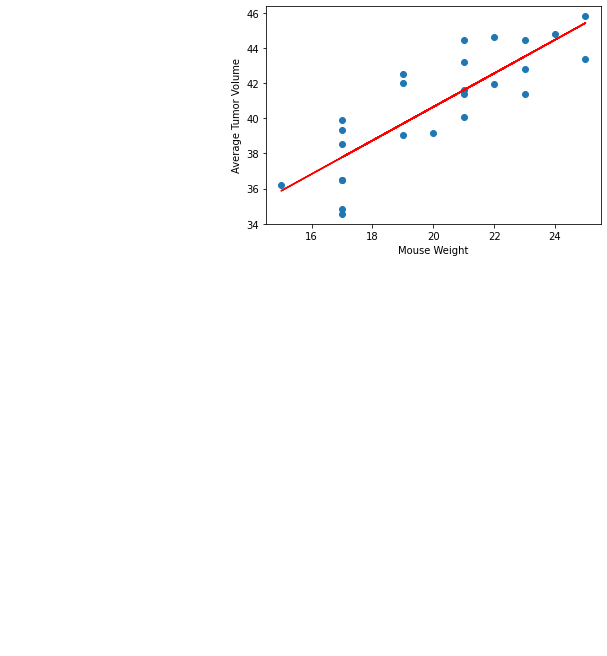

In [109]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


#Using same x and y values create a scatter with linear regression
x_value = c_avg["Weight (g)"]
y_value = c_avg["Tumor Volume (mm3)"]

#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()